In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.10G}'.format

import csv

In [3]:
df = pd.read_csv('./stanford-ner-2018-02-27/train_links/experimento_links_y_regexp/train_links_2.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )
df_result = pd.read_csv('./stanford-ner-2018-02-27/train_links/experimento_links_y_regexp/result_linked_2.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )
#df = pd.read_csv('./train_links.tsv', sep='\t', encoding='utf8',error_bad_lines=False, header=None )

In [4]:
df.head()

,0,1
0,INSTITUTO,O
1,NACIONAL,O
2,DE,O
3,SEMILLAS,O
4,Resolución,O


In [5]:
df.describe()

,0,1
count,766102,766131
unique,38655,10
top,de,O
freq,64636,750997


In [16]:
len(df)

766131

In [6]:
df_result.head()

,0,1,2
0,(Nota,O,O
1,Infoleg:,O,O
2,La,O,O
3,presente,O,O
4,Ley,O,O


In [7]:
df_result.describe()

,0,1,2
count,774761,774794,774794
unique,43324,10,9
top,de,O,O
freq,63050,762160,764256


In [8]:
df[1].unique()

array(['O', 'LEY', 'DECRETO', 'ARTÍCULO', 'EXPEDIENTE', 'ENTITY',
       'RESOLUCIÓN', 'DISPOSICIÓN', 'DECISION', 'INSTRUCCION'],
      dtype=object)

In [9]:
df_result[1].unique()

array(['O', 'ENTITY', 'LEY', 'ARTÍCULO', 'DECRETO', 'RESOLUCIÓN',
       'DISPOSICIÓN', 'EXPEDIENTE', 'INSTRUCCION', 'DECISION'],
      dtype=object)

In [10]:
df_result[2].unique()

array(['O', 'LEY', 'ARTÍCULO', 'ENTITY', 'DECRETO', 'RESOLUCIÓN',
       'DISPOSICIÓN', 'EXPEDIENTE', 'DECISION'], dtype=object)

In [48]:
df_result[(df_result[1] == 'O')].count()

0    678481
1    678507
2    678507
dtype: int64

In [46]:
df_result[(df_result[1] == 'O') & (df_result[2] != 'O')].count()

0    122
1    127
2    127
dtype: int64

In [86]:
df_O_error = df_result[(df_result[1] == 'O') & (df_result[2] != 'O')]

In [87]:
len(df_O_error)

127

#### DE  127 a los que les asignó una clase y eran '0' solo 5 estaban mal y eran NaN

Index:
1 (104352)
1 (333505  )
1 (525236 )
1 525256
1(540936)


In [61]:
i = 0 
for index in df_O_error.index.values:
    print('---------------------------')
    print(df_result.loc[[index]])        
    print(df_result.loc[[index+1]])        
    print(df_result.loc[[index+2]]) 
    print('---------------------------')
    

---------------------------
             0  1        2
93459  Decreto  O  DECRETO
         0  1  2
93460  NÂ°  O  O
         0  1  2
93461  924  O  O
---------------------------
---------------------------
             0  1        2
93571  Decreto  O  DECRETO
         0  1  2
93572  NÂ°  O  O
         0  1  2
93573  924  O  O
---------------------------
---------------------------
             0  1        2
93699  Decreto  O  DECRETO
         0  1  2
93700  NÂ°  O  O
         0  1  2
93701  924  O  O
---------------------------
---------------------------
             0  1        2
93835  Decreto  O  DECRETO
         0  1        2
93836  NÂ°  O  DECRETO
         0  1        2
93837  584  O  DECRETO
---------------------------
---------------------------
         0  1        2
93836  NÂ°  O  DECRETO
         0  1        2
93837  584  O  DECRETO
         0  1  2
93838  del  O  O
---------------------------
---------------------------
         0  1        2
93837  584  O  DECRETO
        

         0  1       2
380743  N°  O  ENTITY
             0  1       2
380744  1/2015  O  ENTITY
         0  1  2
380745  de  O  O
---------------------------
---------------------------
             0  1       2
380744  1/2015  O  ENTITY
         0  1  2
380745  de  O  O
         0  1  2
380746  la  O  O
---------------------------
---------------------------
                  0  1       2
380772  Disposición  O  ENTITY
         0  1       2
380773  N°  O  ENTITY
             0  1       2
380774  7/2014  O  ENTITY
---------------------------
---------------------------
         0  1       2
380773  N°  O  ENTITY
             0  1       2
380774  7/2014  O  ENTITY
         0  1  2
380775  de  O  O
---------------------------
---------------------------
             0  1       2
380774  7/2014  O  ENTITY
         0  1  2
380775  de  O  O
         0  1  2
380776  la  O  O
---------------------------
---------------------------
                  0  1       2
380799  Disposición  O  ENTITY


525257  .O.  O  O
                 0  1  2
525258  31/01/2017  O  O
---------------------------
---------------------------
          0  1         2
540936  NaN  O  DECISION
          0  1  2
540937  .O.  O  O
                0  1  2
540938  3/6/2008;  O  O
---------------------------
---------------------------
             0  1       2
556394  Anexos  O  ENTITY
         0  1       2
556395  II  O  ENTITY
        0  1       2
556396  y  O  ENTITY
---------------------------
---------------------------
         0  1       2
556395  II  O  ENTITY
        0  1       2
556396  y  O  ENTITY
          0  1       2
556397  III  O  ENTITY
---------------------------
---------------------------
        0  1       2
556396  y  O  ENTITY
          0  1       2
556397  III  O  ENTITY
         0  1  2
556398  de  O  O
---------------------------
---------------------------
          0  1       2
556397  III  O  ENTITY
         0  1  2
556398  de  O  O
         0  1  2
556399  la  O  O
------------

In [85]:
df_result.iloc[525230:525242]

,0,1,2
525230,art.,O,O
525231,1º,O,O
525232,del,O,O
525233,Decreto,O,O
525234,Nº,O,O
525235,78/2017,O,O
525236,NaN,O,DECISION
525237,.O.,O,O
525238,31/01/2017,O,O
525239,;,O,O


In [96]:
df_result.iloc[412877:412900].head()

,0,1,2
412877,ANEXO,O,O
412878,I,O,O
412879,0602.20.00,O,O
412880,(1),O,O
412881,1302.14.00,O,O


In [104]:
df_result[df_result[1] == 'O'].count()

0    678481
1    678507
2    678507
dtype: int64

In [106]:
df_result[df_result[1] == 'INSTRUCCION'].count()

0    102
1    102
2    102
dtype: int64

In [110]:
df_result[df_result[1] == 'DECISION'].count()

0    759
1    765
2    765
dtype: int64

In [112]:
df_result[df_result[1] == 'DECRETO'].count()

0    154
1    155
2    155
dtype: int64

In [111]:
from sklearn.metrics import classification_report

target_names = ['DECISION', 'DECRETO', 'ENTITY', 'INSTRUCCION', 'O']
print(classification_report(df_result[1], df_result[2], target_names=target_names))

             precision    recall  f1-score   support

   DECISION       0.98      0.76      0.86       765
    DECRETO       0.61      0.76      0.68       155
     ENTITY       0.88      0.51      0.65      1406
INSTRUCCION       1.00      0.91      0.95       102
          O       1.00      1.00      1.00    678507

avg / total       1.00      1.00      1.00    680935



In [125]:
count_decretos = df_result[df_result[1] == 'DECRETO'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'DECRETO') & (df_result[2] == 'DECRETO')][2].count() 
print('coverage en decretos: ', count_predict_decretos/count_decretos)

coverage en decretos:  0.7612903225806451


In [126]:
count_decretos = df_result[df_result[1] == 'DECISION'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'DECISION') & (df_result[2] == 'DECISION')][2].count() 
print('coverage en decisiones: ', count_predict_decretos/count_decretos)

coverage en decisiones:  0.7633986928104575


In [127]:
count_decretos = df_result[df_result[1] == 'INSTRUCCION'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'INSTRUCCION') & (df_result[2] == 'INSTRUCCION')][2].count() 
print('coverage en instrucciones: ', count_predict_decretos/count_decretos)

coverage en instrucciones:  0.9117647058823529


In [128]:
count_decretos = df_result[df_result[1] == 'ENTITY'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'ENTITY') & (df_result[2] == 'ENTITY')][2].count() 
print('coverage en entity: ', count_predict_decretos/count_decretos)

coverage en entity:  0.5135135135135135


In [130]:
count_decretos = df_result[df_result[1] == 'O'][1].count()
count_predict_decretos = df_result[(df_result[1] == 'O') & (df_result[2] == 'O')][2].count() 
print('coverage en O: ', count_predict_decretos/count_decretos)

coverage en O:  0.9998128243334262


In [136]:
df[df[1] == 'ENTITY'].count()

0     975
1    1001
dtype: int64

In [138]:
df_result[df_result[1] == 'ENTITY'].count()

0    1382
1    1406
2    1406
dtype: int64

In [139]:
df[df[1] == 'INSTRUCCION'].count()

0    221
1    221
dtype: int64

In [141]:
df_result[df_result[1] == 'INSTRUCCION'].count()

0    102
1    102
2    102
dtype: int64

In [142]:
df_result[df_result[1] == 'DECISION'].count()

0    759
1    765
2    765
dtype: int64

In [133]:
df[df[1] == 'DECISION'].count()

0    777
1    783
dtype: int64

In [143]:
df[df[1] == 'DECRETO'].count()

0    464
1    469
dtype: int64

In [144]:
df_result[df_result[1] == 'DECRETO'].count()

0    154
1    155
2    155
dtype: int64

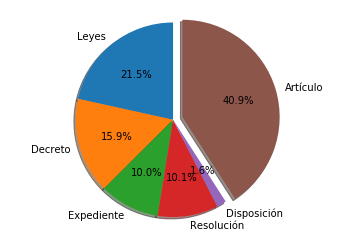

In [93]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Leyes', 'Decreto', 'Expediente', 'Resolución', 'Disposición', 'Artículo'
sizes = [21.55, 15.92, 10, 10.05, 1.58, 40.9]
explode = (0, 0, 0, 0, 0 ,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()